In [6]:
import folium
import json
import pandas as pd
import numpy as np
import os
import seaborn as sns
from tqdm import tqdm

# import geopandas as gpd
# from shapely.geometry import Polygon, LineString, Point
# import fiona


import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import lightgbm as lgb
import statsmodels.api as sm


In [3]:
from matplotlib import font_manager, rc
font_path = "data/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

import matplotlib.pyplot as plt


%matplotlib inline

In [5]:
df1 = pd.read_csv("output/그리드 전처리 완료/PM사고/서초강남PM교통사고전처리완료.csv")
df2 = pd.read_csv("output/그리드 전처리 완료/격자인구/서초강남2030대인구전처리완료.csv")
df3 = pd.read_csv("output/그리드 전처리 완료/교통시설물/서초강남과속방지턱전처리완료.csv")
df4 = pd.read_csv("output/그리드 전처리 완료/교통시설물/서초강남무인교통단속카메라전처리완료.csv")
df5 = pd.read_csv("output/그리드 전처리 완료/교통시설물/서초강남횡단보도부착대전처리완료.csv")


In [76]:
df6 = pd.read_csv("output/그리드 전처리 완료/버스승하차/서초강남버스아침승차.csv")
df7 = pd.read_csv("output/그리드 전처리 완료/버스승하차/서초강남버스아침하차.csv")

In [7]:

df8 = pd.read_csv("output/그리드 전처리 완료/버스승하차/서초강남버스저녁승차.csv")
df9 = pd.read_csv("output/그리드 전처리 완료/버스승하차/서초강남버스저녁하차.csv")


In [8]:
df10 = pd.read_csv("output/그리드 전처리 완료/상권학교/서초강남관광여가오락전처리완료.csv")
df11 = pd.read_csv("output/그리드 전처리 완료/상권학교/서초강남부동산전처리완료.csv")
df12 = pd.read_csv("output/그리드 전처리 완료/상권학교/서초강남생활서비스전처리완료.csv")
df13 = pd.read_csv("output/그리드 전처리 완료/상권학교/서초강남소매점전처리완료.csv")
df14 = pd.read_csv("output/그리드 전처리 완료/상권학교/서초강남숙박전처리완료.csv")
df15 = pd.read_csv("output/그리드 전처리 완료/상권학교/서초강남스포츠전처리완료.csv")
df16 = pd.read_csv("output/그리드 전처리 완료/상권학교/서초강남음식점전처리완료.csv")
df17 = pd.read_csv("output/그리드 전처리 완료/상권학교/서초강남학교전처리완료.csv")
df18 = pd.read_csv("output/그리드 전처리 완료/상권학교/서초강남학문교육전처리완료.csv")


In [9]:
df19 = pd.read_csv("output/그리드 전처리 완료/자전거이용/서초강남출근시간자전거.csv")
df20 = pd.read_csv("output/그리드 전처리 완료/자전거이용/서초강남퇴근시간자전거.csv")


In [10]:
df21 = pd.read_csv("output/그리드 전처리 완료/지하철승하차/서초강남지하철아침승차.csv")
df22 = pd.read_csv("output/그리드 전처리 완료/지하철승하차/서초강남지하철아침하차.csv")
df23 = pd.read_csv("output/그리드 전처리 완료/지하철승하차/서초강남지하철저녁승차.csv")
df24 = pd.read_csv("output/그리드 전처리 완료/지하철승하차/서초강남지하철저녁하차.csv")


In [21]:
df1 = df1[["gid","TL_cnt"]]
df1.columns = ["gid","acci_cnt"]
df1

,gid,acci_cnt
0,다사542434,1
1,다사547430,1
2,다사549419,1
3,다사551417,1
4,다사564435,1
5,다사566432,1
6,다사567450,1
7,다사568465,1
8,다사569441,1
9,다사570474,1


In [23]:
df2 = df2[["gid","2030val"]]
df2

,gid,2030val
0,다사579454,77.0
1,다사613448,66.0
2,다사585452,0.0
3,다사583456,227.0
4,다사592432,85.0
...,...,...
9128,다사559438,0.0
9129,다사618387,0.0
9130,다사559464,0.0
9131,다사585417,0.0


In [27]:
df3 = df3[["gid","TL_cnt"]]
df3.columns = ["gid","과속방지턱"]
df3

,gid,과속방지턱
0,다사571457,2
1,다사575448,1
2,다사575455,1
3,다사576454,1
4,다사615393,1
5,다사615394,2
6,다사615395,2
7,다사616392,2
8,다사616396,2
9,다사617396,2


In [ ]:
df4 = df4[["gid","TL_cnt"]]
df4.columns = ["gid","무인카메라"]

In [32]:
df4

,gid,무인카메라
0,다사542430,1
1,다사542436,1
2,다사543443,1
3,다사546413,1
4,다사546431,1
...,...,...
89,다사647407,1
90,다사651418,1
91,다사652406,1
92,다사653419,1


In [37]:
df5 = df5[["gid","TL_cnt"]]
df5.columns = ["gid","신호등"]
df5

,gid,신호등
0,다사541420,21
1,다사541421,1
2,다사541424,6
3,다사541425,4
4,다사541427,5
...,...,...
1290,다사663411,2
1291,다사663413,2
1292,다사664409,3
1293,다사664410,2


In [77]:
df6 = df6[["gid","아침총승객수"]]
df6.columns = ["gid", "버스아침승차"]
df6

,gid,버스아침승차
0,다사540452,95.915000
1,다사541419,2123.280992
2,다사541421,933.513889
3,다사541423,957.306122
4,다사542418,200.000000
...,...,...
773,다사655420,1901.504267
774,다사658421,1662.390390
775,다사660408,25.277778
776,다사662409,47.888889


In [78]:
df6

,gid,버스아침승차
0,다사540452,95.915000
1,다사541419,2123.280992
2,다사541421,933.513889
3,다사541423,957.306122
4,다사542418,200.000000
...,...,...
773,다사655420,1901.504267
774,다사658421,1662.390390
775,다사660408,25.277778
776,다사662409,47.888889


In [79]:
df7 = df7[["gid","아침총승객수"]]
df7.columns = ["gid", "버스아침하차"]
df7

,gid,버스아침하차
0,다사540452,290.648333
1,다사541419,1642.181818
2,다사541421,4109.416667
3,다사541423,1936.224490
4,다사542418,2066.666667
...,...,...
773,다사655420,438.883357
774,다사658421,495.613363
775,다사660408,138.805556
776,다사662409,171.111111


In [43]:
df8 = df8[["gid","저녁총승객수"]]
df8.columns = ["gid", "버스저녁승차"]
df8

,gid,버스저녁승차
0,다사540452,530.146667
1,다사541419,1891.380165
2,다사541421,3695.930556
3,다사541423,1792.285714
4,다사542418,125.583333
...,...,...
773,다사655420,678.780228
774,다사658421,635.659910
775,다사660408,74.444444
776,다사662409,145.805556


In [44]:
df9 = df9[["gid","저녁총승객수"]]
df9.columns = ["gid", "버스저녁하차"]
df9

,gid,버스저녁하차
0,다사540452,507.370000
1,다사541419,848.768595
2,다사541421,1874.736111
3,다사541423,1591.408163
4,다사542418,2929.583333
...,...,...
773,다사655420,1905.945235
774,다사658421,1263.244745
775,다사660408,58.083333
776,다사662409,63.138889


In [47]:
df10 = df10[["gid","TL_cnt"]]
df10.columns = ["gid","관광여가오락"]
df10

,gid,관광여가오락
0,다사542420,1
1,다사542421,3
2,다사542422,2
3,다사542423,1
4,다사542424,1
...,...,...
633,다사648432,1
634,다사649416,1
635,다사649431,8
636,다사656419,1


In [48]:
df11 = df11[["gid","TL_cnt"]]
df11.columns = ["gid","부동산"]
df11

,gid,부동산
0,다사542417,2
1,다사542418,1
2,다사542424,1
3,다사542425,1
4,다사542427,4
...,...,...
1228,다사656419,2
1229,다사662413,2
1230,다사663408,1
1231,다사663409,1


In [49]:
df12 = df12[["gid","TL_cnt"]]
df12.columns = ["gid","생활서비스"]
df12

,gid,생활서비스
0,다사542417,4
1,다사542418,3
2,다사542422,2
3,다사542423,2
4,다사542424,1
...,...,...
2265,다사662413,6
2266,다사663408,5
2267,다사663411,5
2268,다사664410,1


In [50]:
df13 = df13[["gid","TL_cnt"]]
df13.columns = ["gid","소매점"]
df13

,gid,소매점
0,다사541452,2
1,다사542417,3
2,다사542421,5
3,다사542422,2
4,다사542424,4
...,...,...
2467,다사656419,3
2468,다사657420,1
2469,다사662413,11
2470,다사663408,1


In [51]:
df14 = df14[["gid","TL_cnt"]]
df14.columns = ["gid","숙박"]
df14

,gid,숙박
0,다사542433,1
1,다사543427,2
2,다사545426,1
3,다사545440,2
4,다사545443,1
...,...,...
160,다사613457,3
161,다사614455,1
162,다사615455,1
163,다사616456,1


In [52]:
df15 = df15[["gid","TL_cnt"]]
df15.columns = ["gid","스포츠"]
df15

,gid,스포츠
0,다사542418,1
1,다사543426,1
2,다사543429,1
3,다사543443,1
4,다사545437,1
...,...,...
136,다사621444,1
137,다사628439,2
138,다사632437,1
139,다사633438,1


In [53]:
df16 = df16[["gid","TL_cnt"]]
df16.columns = ["gid","음식점"]
df16

,gid,음식점
0,다사541452,6
1,다사542417,1
2,다사542418,1
3,다사542420,2
4,다사542421,18
...,...,...
2454,다사656419,1
2455,다사658417,3
2456,다사659417,2
2457,다사662413,2


In [54]:
df17 = df17[["gid","TL_cnt"]]
df17.columns = ["gid","학교"]
df17

,gid,학교
0,다사544422,1
1,다사544434,1
2,다사545434,1
3,다사546432,1
4,다사547412,1
...,...,...
129,다사647436,1
130,다사648434,1
131,다사648435,1
132,다사651406,1


In [55]:
df18 = df18[["gid","TL_cnt"]]
df18.columns = ["gid","교육"]
df18

,gid,교육
0,다사542417,1
1,다사542418,2
2,다사542421,1
3,다사542422,1
4,다사542423,1
...,...,...
1374,다사655418,1
1375,다사656419,3
1376,다사657418,1
1377,다사658419,2


In [62]:
df19 = df19[["gid","COUNT"]]
df19.columns = ["gid","출근시간자전거"]
df19

,gid,출근시간자전거
0,다사540449,38
1,다사540450,150
2,다사540451,81
3,다사540452,81
4,다사540453,81
...,...,...
8937,다사666409,7
8938,다사666410,5
8939,다사666411,10
8940,다사667408,5


In [63]:
df20 = df20[["gid","COUNT"]]
df20.columns = ["gid","퇴근시간자전거"]
df20

,gid,퇴근시간자전거
0,다사540449,217
1,다사540450,951
2,다사540451,530
3,다사540452,530
4,다사540453,530
...,...,...
8937,다사666409,8
8938,다사666410,7
8939,다사666411,21
8940,다사667408,4


In [66]:
df21 = df21[["gid","아침총승객수"]]
df21.columns = ["gid","지하철아침승차"]
df21

,gid,지하철아침승차
0,다사540449,33726
1,다사541420,492382
2,다사542431,255165
3,다사546448,15873
4,다사548406,7920
5,다사552432,68725
6,다사554450,18253
7,다사555425,87392
8,다사562451,207342
9,다사564437,71313


In [67]:
df22 = df22[["gid","아침총승객수"]]
df22.columns = ["gid","지하철아침하차"]
df22

,gid,지하철아침하차
0,다사540449,27456
1,다사541420,289888
2,다사542431,215908
3,다사546448,19125
4,다사548406,11631
5,다사552432,164486
6,다사554450,25444
7,다사555425,172153
8,다사562451,508001
9,다사564437,293178


In [68]:
df23 = df23[["gid","저녁총승객수"]]
df23.columns = ["gid","지하철저녁승차"]
df23

,gid,지하철저녁승차
0,다사540449,32063
1,다사541420,387570
2,다사542431,239794
3,다사546448,22862
4,다사548406,10141
5,다사552432,147331
6,다사554450,27760
7,다사555425,158923
8,다사562451,704887
9,다사564437,239588


In [69]:
df24 = df24[["gid","저녁총승객수"]]
df24.columns = ["gid","지하철저녁하차"]
df24

,gid,지하철저녁하차
0,다사540449,31264
1,다사541420,557818
2,다사542431,288908
3,다사546448,18135
4,다사548406,5266
5,다사552432,69086
6,다사554450,18702
7,다사555425,96834
8,다사562451,381072
9,다사564437,54088


In [80]:
final = pd.merge(df1, df2, on ='gid', how = 'outer')
final = pd.merge(final, df3, on ='gid', how = 'outer')
final = pd.merge(final, df4, on ='gid', how = 'outer')
final = pd.merge(final, df5, on ='gid', how = 'outer')
final = pd.merge(final, df6, on ='gid', how = 'outer')
final = pd.merge(final, df7, on ='gid', how = 'outer')
final = pd.merge(final, df8, on ='gid', how = 'outer')
final = pd.merge(final, df9, on ='gid', how = 'outer')
final = pd.merge(final, df10, on ='gid', how = 'outer')
final = pd.merge(final, df11, on ='gid', how = 'outer')
final = pd.merge(final, df12, on ='gid', how = 'outer')
final = pd.merge(final, df13, on ='gid', how = 'outer')
final = pd.merge(final, df14, on ='gid', how = 'outer')
final = pd.merge(final, df15, on ='gid', how = 'outer')
final = pd.merge(final, df16, on ='gid', how = 'outer')
final = pd.merge(final, df17, on ='gid', how = 'outer')
final = pd.merge(final, df18, on ='gid', how = 'outer')
final = pd.merge(final, df19, on ='gid', how = 'outer')
final = pd.merge(final, df20, on ='gid', how = 'outer')
final = pd.merge(final, df21, on ='gid', how = 'outer')
final = pd.merge(final, df22, on = 'gid', how = 'outer')
final = pd.merge(final, df23, on = 'gid', how = 'outer')
final = pd.merge(final, df24, on = 'gid', how = 'outer')

In [81]:
final

,gid,acci_cnt,2030val,과속방지턱,무인카메라,신호등,버스아침승차,버스아침하차,버스저녁승차,버스저녁하차,...,스포츠,음식점,학교,교육,출근시간자전거,퇴근시간자전거,지하철아침승차,지하철아침하차,지하철저녁승차,지하철저녁하차
0,다사542434,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,46,201,NaN,NaN,NaN,NaN
1,다사547430,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,53,137,NaN,NaN,NaN,NaN
2,다사549419,1.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,10,NaN,NaN,NaN,NaN
3,다사551417,1.0,26.0,NaN,NaN,NaN,2486.75,3392.25,1914.833333,3168.333333,...,NaN,1.0,NaN,NaN,3,9,NaN,NaN,NaN,NaN
4,다사564435,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,16,54,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,다사559438,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,23,105,NaN,NaN,NaN,NaN
9129,다사618387,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
9130,다사559464,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,135,886,NaN,NaN,NaN,NaN
9131,다사585417,NaN,0.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,219,303,NaN,NaN,NaN,NaN


In [82]:
final= final[final['gid'] != "Na"]
data_final = final.fillna(0)

In [83]:
data_final

,gid,acci_cnt,2030val,과속방지턱,무인카메라,신호등,버스아침승차,버스아침하차,버스저녁승차,버스저녁하차,...,스포츠,음식점,학교,교육,출근시간자전거,퇴근시간자전거,지하철아침승차,지하철아침하차,지하철저녁승차,지하철저녁하차
0,다사542434,1.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,46,201,0.0,0.0,0.0,0.0
1,다사547430,1.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,53,137,0.0,0.0,0.0,0.0
2,다사549419,1.0,67.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,2,10,0.0,0.0,0.0,0.0
3,다사551417,1.0,26.0,0.0,0.0,0.0,2486.75,3392.25,1914.833333,3168.333333,...,0.0,1.0,0.0,0.0,3,9,0.0,0.0,0.0,0.0
4,다사564435,1.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,...,0.0,3.0,0.0,0.0,16,54,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,다사559438,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,23,105,0.0,0.0,0.0,0.0
9129,다사618387,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0
9130,다사559464,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,135,886,0.0,0.0,0.0,0.0
9131,다사585417,0.0,0.0,0.0,0.0,7.0,0.00,0.00,0.000000,0.000000,...,0.0,0.0,0.0,1.0,219,303,0.0,0.0,0.0,0.0


In [74]:
data_final.describe()


,acci_cnt,2030val,과속방지턱,무인카메라,신호등,버스아침하차_x,버스아침하차_y,버스저녁승차,버스저녁하차,관광여가오락,...,스포츠,음식점,학교,교육,출근시간자전거,퇴근시간자전거,지하철아침승차,지하철아침하차,지하철저녁승차,지하철저녁하차
count,9133.000000,9133.000000,9133.000000,9133.000000,9133.000000,9133.000000,9133.000000,9133.000000,9133.000000,9133.000000,...,9133.00000,9133.000000,9133.000000,9133.000000,9133.000000,9133.000000,9133.000000,9133.000000,9133.000000,9133.000000
mean,0.007446,29.177269,0.004599,0.010949,0.631446,113.063959,131.137970,122.118120,103.237529,0.117486,...,0.01719,2.197087,0.015110,0.407752,39.113982,153.912734,395.876163,1407.282164,1332.648965,549.111464
std,0.088481,56.486076,0.086170,0.106154,2.061724,789.324845,665.306787,615.832761,500.981452,0.523321,...,0.14129,6.461087,0.125536,1.658726,48.431358,220.715328,8077.529419,27058.220044,25634.684104,11159.086095
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,4.000000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,23.000000,71.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,1.000000,0.000000,0.000000,57.000000,204.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,996.000000,3.000000,2.000000,30.000000,31080.722222,12639.506944,10264.572917,7364.291667,13.000000,...,3.00000,251.000000,2.000000,52.000000,388.000000,2254.000000,492382.000000,955291.000000,912929.000000,557818.000000


In [84]:
data_final.to_csv('output/그리드 전처리 완료/final_data.csv', encoding='utf-8-sig',index=False)

In [135]:
data_final = data_final.drop_duplicates()

In [142]:
data_final = data_final.reset_index(inplace=False)

In [143]:
data_final

,index,gid,acci_cnt,2030val,과속방지턱,무인카메라,신호등,버스아침승차,버스아침하차,버스저녁승차,...,스포츠,음식점,학교,교육,출근시간자전거,퇴근시간자전거,지하철아침승차,지하철아침하차,지하철저녁승차,지하철저녁하차
0,0,다사542434,1.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,...,0.0,0.0,0.0,0.0,46,201,0.0,0.0,0.0,0.0
1,1,다사547430,1.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,...,0.0,0.0,0.0,0.0,53,137,0.0,0.0,0.0,0.0
2,2,다사549419,1.0,67.0,0.0,0.0,0.0,0.00,0.00,0.000000,...,0.0,0.0,0.0,0.0,2,10,0.0,0.0,0.0,0.0
3,3,다사551417,1.0,26.0,0.0,0.0,0.0,2486.75,3392.25,1914.833333,...,0.0,1.0,0.0,0.0,3,9,0.0,0.0,0.0,0.0
4,4,다사564435,1.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,...,0.0,3.0,0.0,0.0,16,54,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8983,9128,다사559438,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,...,0.0,0.0,0.0,0.0,23,105,0.0,0.0,0.0,0.0
8984,9129,다사618387,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,...,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0
8985,9130,다사559464,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,...,0.0,0.0,0.0,0.0,135,886,0.0,0.0,0.0,0.0
8986,9131,다사585417,0.0,0.0,0.0,0.0,7.0,0.00,0.00,0.000000,...,0.0,0.0,0.0,1.0,219,303,0.0,0.0,0.0,0.0


In [145]:
data_final = data_final[['gid', 'acci_cnt', '2030val', '과속방지턱', '무인카메라', '신호등',
       '버스아침승차', '버스아침하차', '버스저녁승차', '버스저녁하차', '관광여가오락', '부동산', '생활서비스', '소매점',
       '숙박', '스포츠', '음식점', '학교', '교육', '출근시간자전거', '퇴근시간자전거', '지하철아침승차',
       '지하철아침하차', '지하철저녁승차', '지하철저녁하차']]

data_final

,gid,acci_cnt,2030val,과속방지턱,무인카메라,신호등,버스아침승차,버스아침하차,버스저녁승차,버스저녁하차,...,스포츠,음식점,학교,교육,출근시간자전거,퇴근시간자전거,지하철아침승차,지하철아침하차,지하철저녁승차,지하철저녁하차
0,다사542434,1.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,46,201,0.0,0.0,0.0,0.0
1,다사547430,1.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,53,137,0.0,0.0,0.0,0.0
2,다사549419,1.0,67.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,2,10,0.0,0.0,0.0,0.0
3,다사551417,1.0,26.0,0.0,0.0,0.0,2486.75,3392.25,1914.833333,3168.333333,...,0.0,1.0,0.0,0.0,3,9,0.0,0.0,0.0,0.0
4,다사564435,1.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,...,0.0,3.0,0.0,0.0,16,54,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8983,다사559438,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,23,105,0.0,0.0,0.0,0.0
8984,다사618387,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0
8985,다사559464,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,135,886,0.0,0.0,0.0,0.0
8986,다사585417,0.0,0.0,0.0,0.0,7.0,0.00,0.00,0.000000,0.000000,...,0.0,0.0,0.0,1.0,219,303,0.0,0.0,0.0,0.0


In [146]:
data_final.to_csv('output/그리드 전처리 완료/final_data2.csv', encoding='utf-8-sig',index=False)

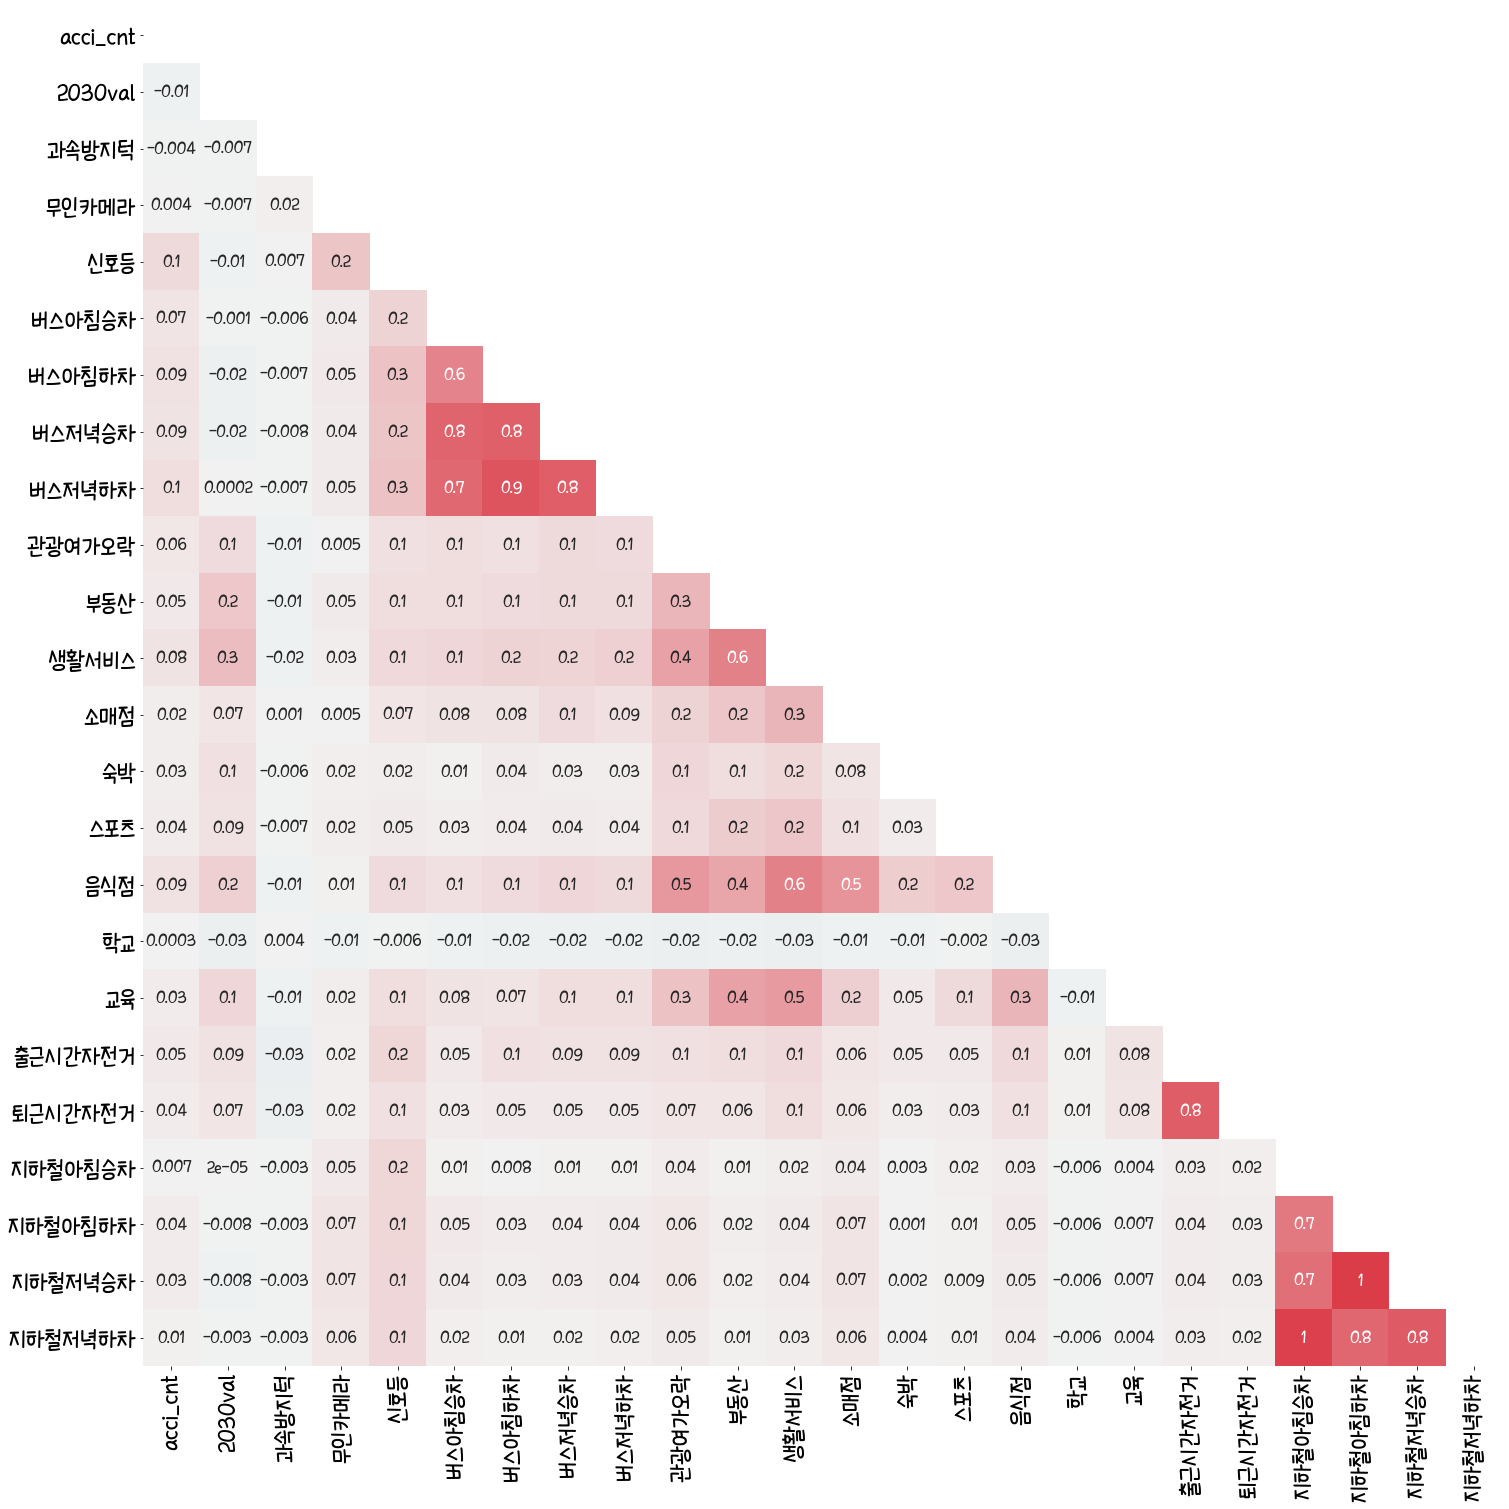

In [167]:
## correlation plot 

# plot size 설정 
f, ax = plt.subplots(figsize=(25,25))
plt.rcParams['font.size'] =19

# upper matrix
matrix = np.triu(data_final.corr())
# palette 
colormap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(data_final.corr(),
                annot=True, annot_kws={"size": 18}, fmt ='.1g',
                center = 0, vmin=-1, vmax=1, 
                cmap = colormap, cbar = False, #cbar_kws= {'orientation': 'horizontal'} , 
                square = True, mask = matrix)

# plt.show()

plt.savefig('output/그리드 전처리 완료/correlation_plot.png')

In [151]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import lightgbm as lgb
import statsmodels.api as sm


In [152]:
data_final.columns

Index(['gid', 'acci_cnt', '2030val', '과속방지턱', '무인카메라', '신호등', '버스아침승차',
       '버스아침하차', '버스저녁승차', '버스저녁하차', '관광여가오락', '부동산', '생활서비스', '소매점', '숙박',
       '스포츠', '음식점', '학교', '교육', '출근시간자전거', '퇴근시간자전거', '지하철아침승차', '지하철아침하차',
       '지하철저녁승차', '지하철저녁하차'],
      dtype='object')

In [160]:
# 전진단계별 선택법

variables = data_final[[ '2030val', '과속방지턱', '무인카메라', '신호등', '버스아침승차',
       '버스아침하차', '버스저녁승차', '버스저녁하차', '관광여가오락', '부동산', '생활서비스', '소매점', '숙박',
       '스포츠', '음식점', '학교', '교육', '출근시간자전거', '퇴근시간자전거', '지하철아침승차', '지하철아침하차',
       '지하철저녁승차', '지하철저녁하차']]
y = data_final[['acci_cnt']]


selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = data_final[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = data_final[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(data_final[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

<ipython-input-160-b649affe6c7d>:20: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-160-b649affe6c7d>:20: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-160-b649affe6c7d>:20: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-160-b649affe6c7d>:20: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)

In [161]:
selected_variables

['신호등', '버스저녁하차', '음식점', '소매점', '무인카메라', '생활서비스', '2030val']

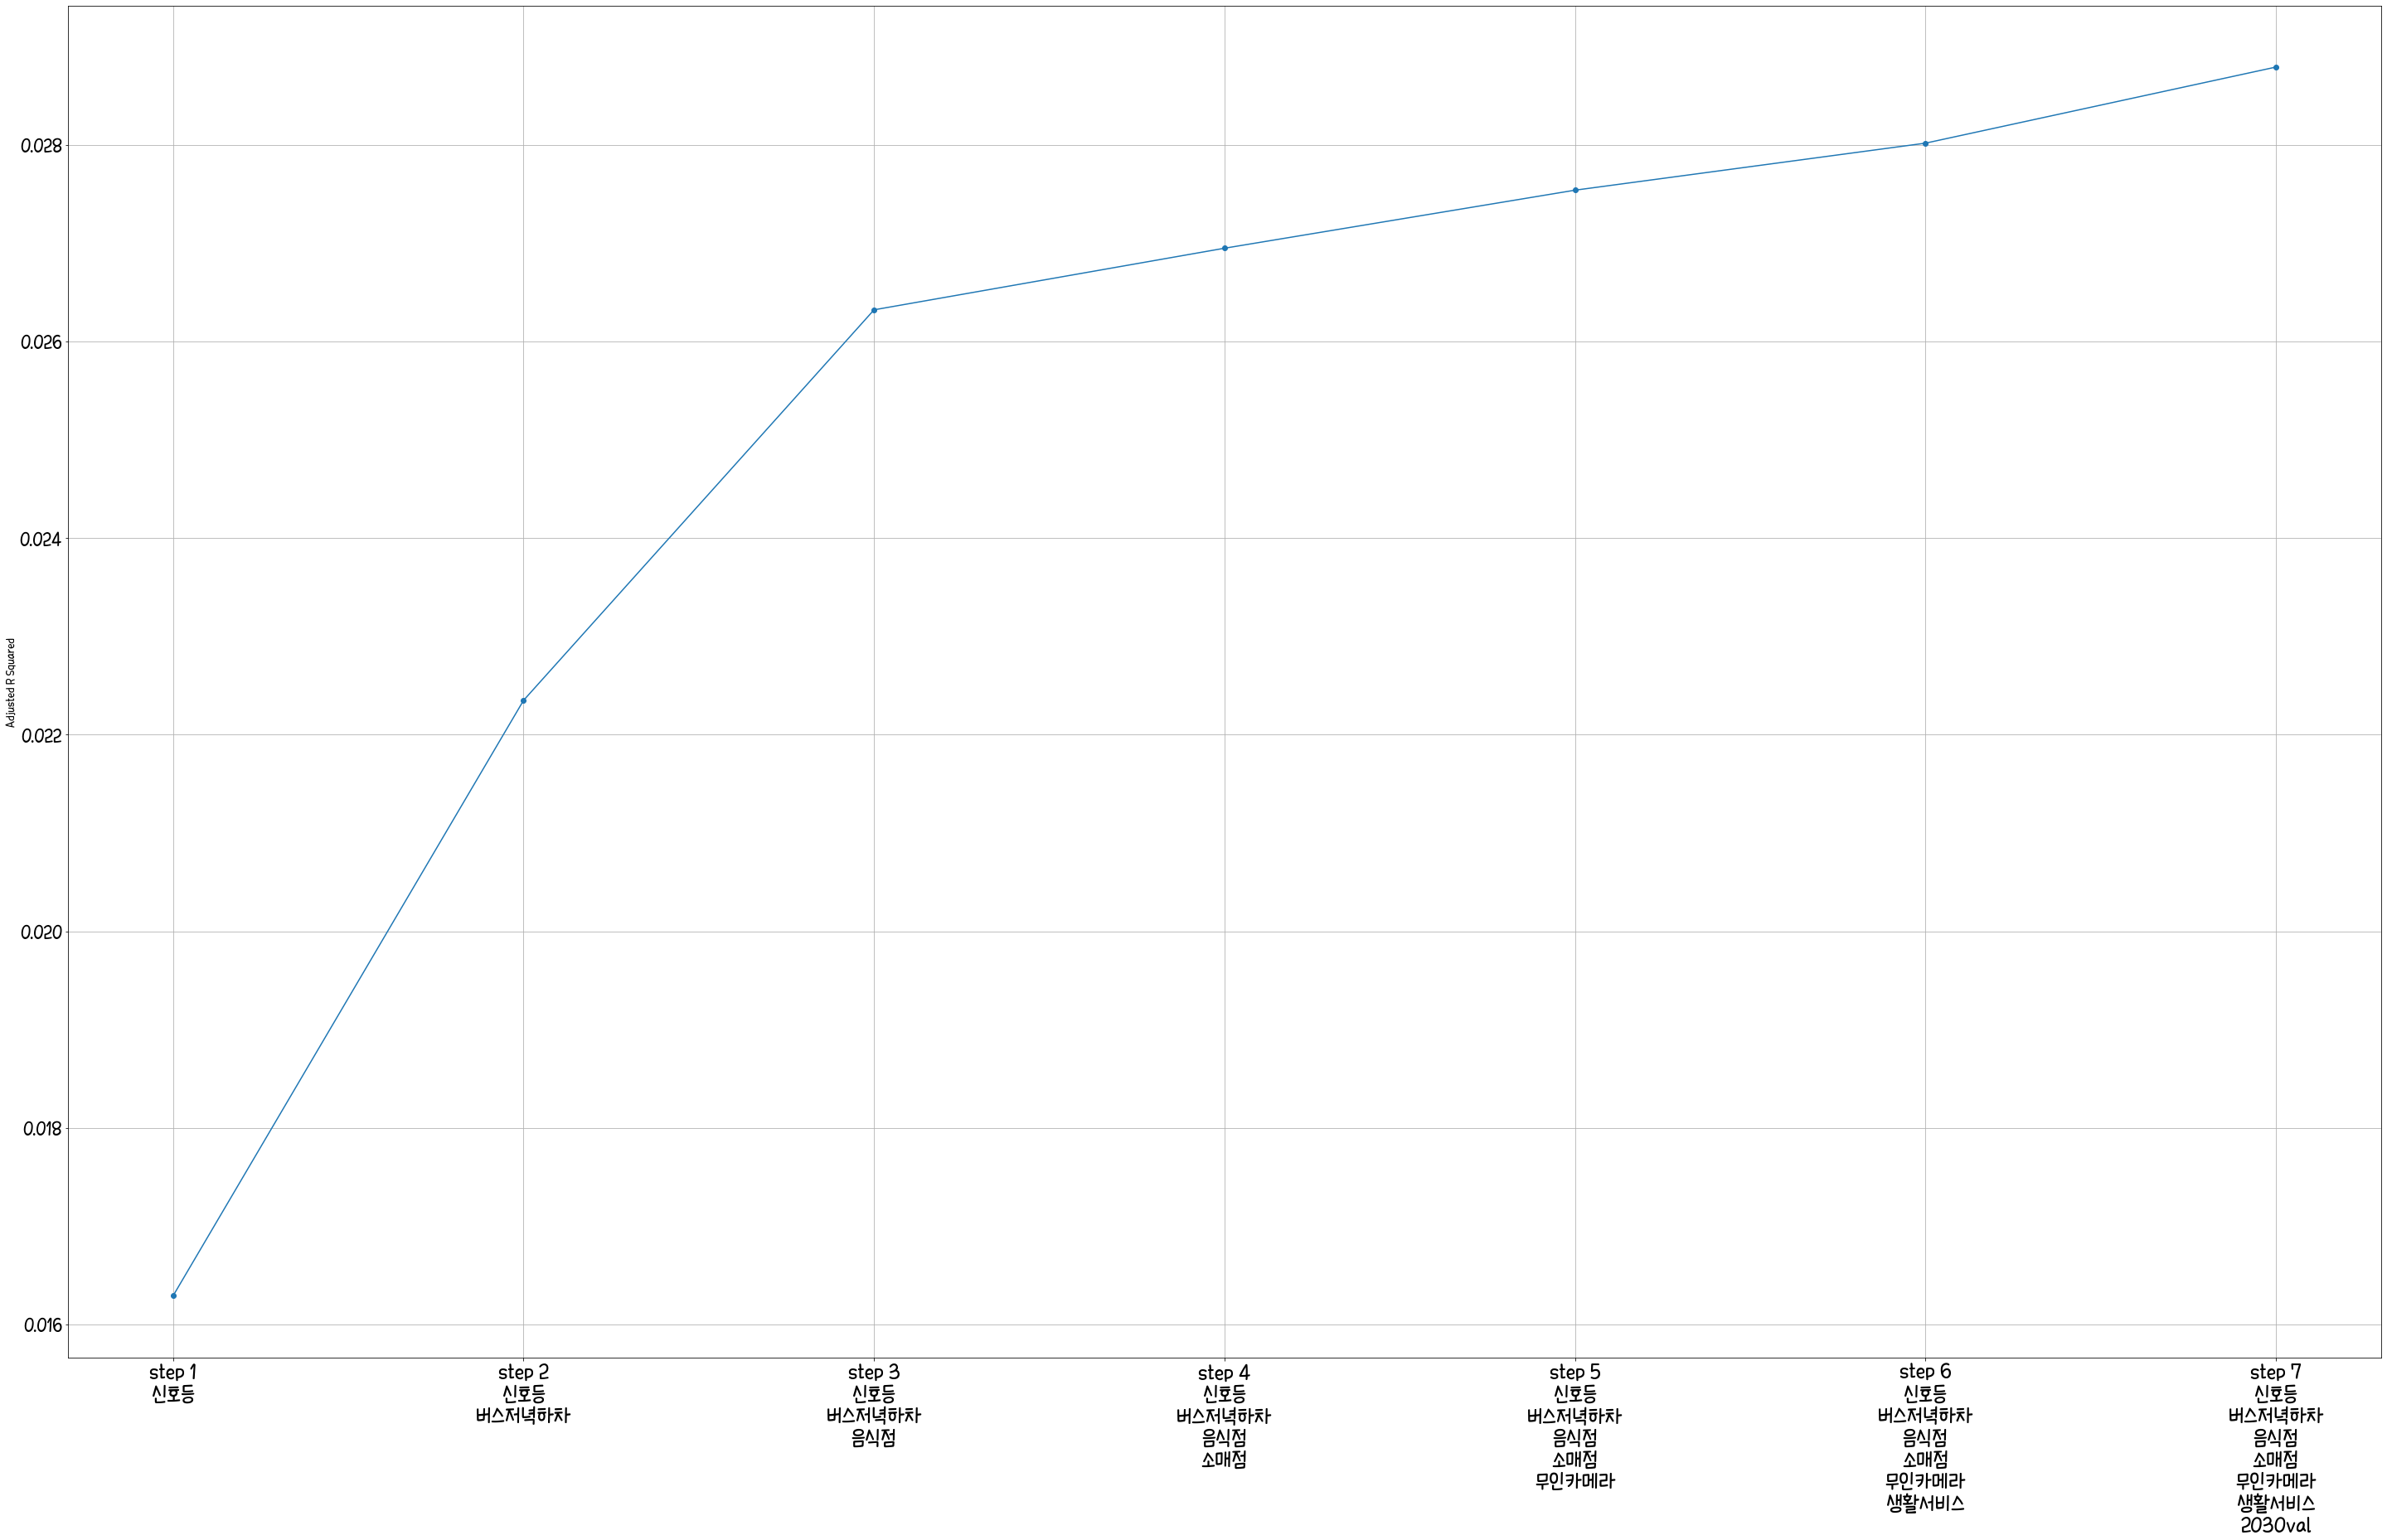

In [168]:
plt.rcParams['font.size'] =23

# upper matrix
fig = plt.figure(figsize=(50,30))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=27)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.savefig('output/그리드 전처리 완료/종속변수사고전진단계.png')

In [169]:
# 전진단계별 선택법

variables = data_final[[ 'acci_cnt', '과속방지턱', '무인카메라', '신호등', '버스아침승차',
       '버스아침하차', '버스저녁승차', '버스저녁하차', '관광여가오락', '부동산', '생활서비스', '소매점', '숙박',
       '스포츠', '음식점', '학교', '교육', '출근시간자전거', '퇴근시간자전거', '지하철아침승차', '지하철아침하차',
       '지하철저녁승차', '지하철저녁하차']]
y = data_final[['2030val']]


selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = data_final[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = data_final[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(data_final[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

<ipython-input-169-b99382dca515>:20: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-169-b99382dca515>:20: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-169-b99382dca515>:20: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-169-b99382dca515>:20: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)

In [170]:
selected_variables

['생활서비스',
 '부동산',
 '버스아침하차',
 '숙박',
 '출근시간자전거',
 '신호등',
 '소매점',
 'acci_cnt',
 '학교',
 '버스저녁하차',
 '버스저녁승차',
 '음식점',
 '관광여가오락']

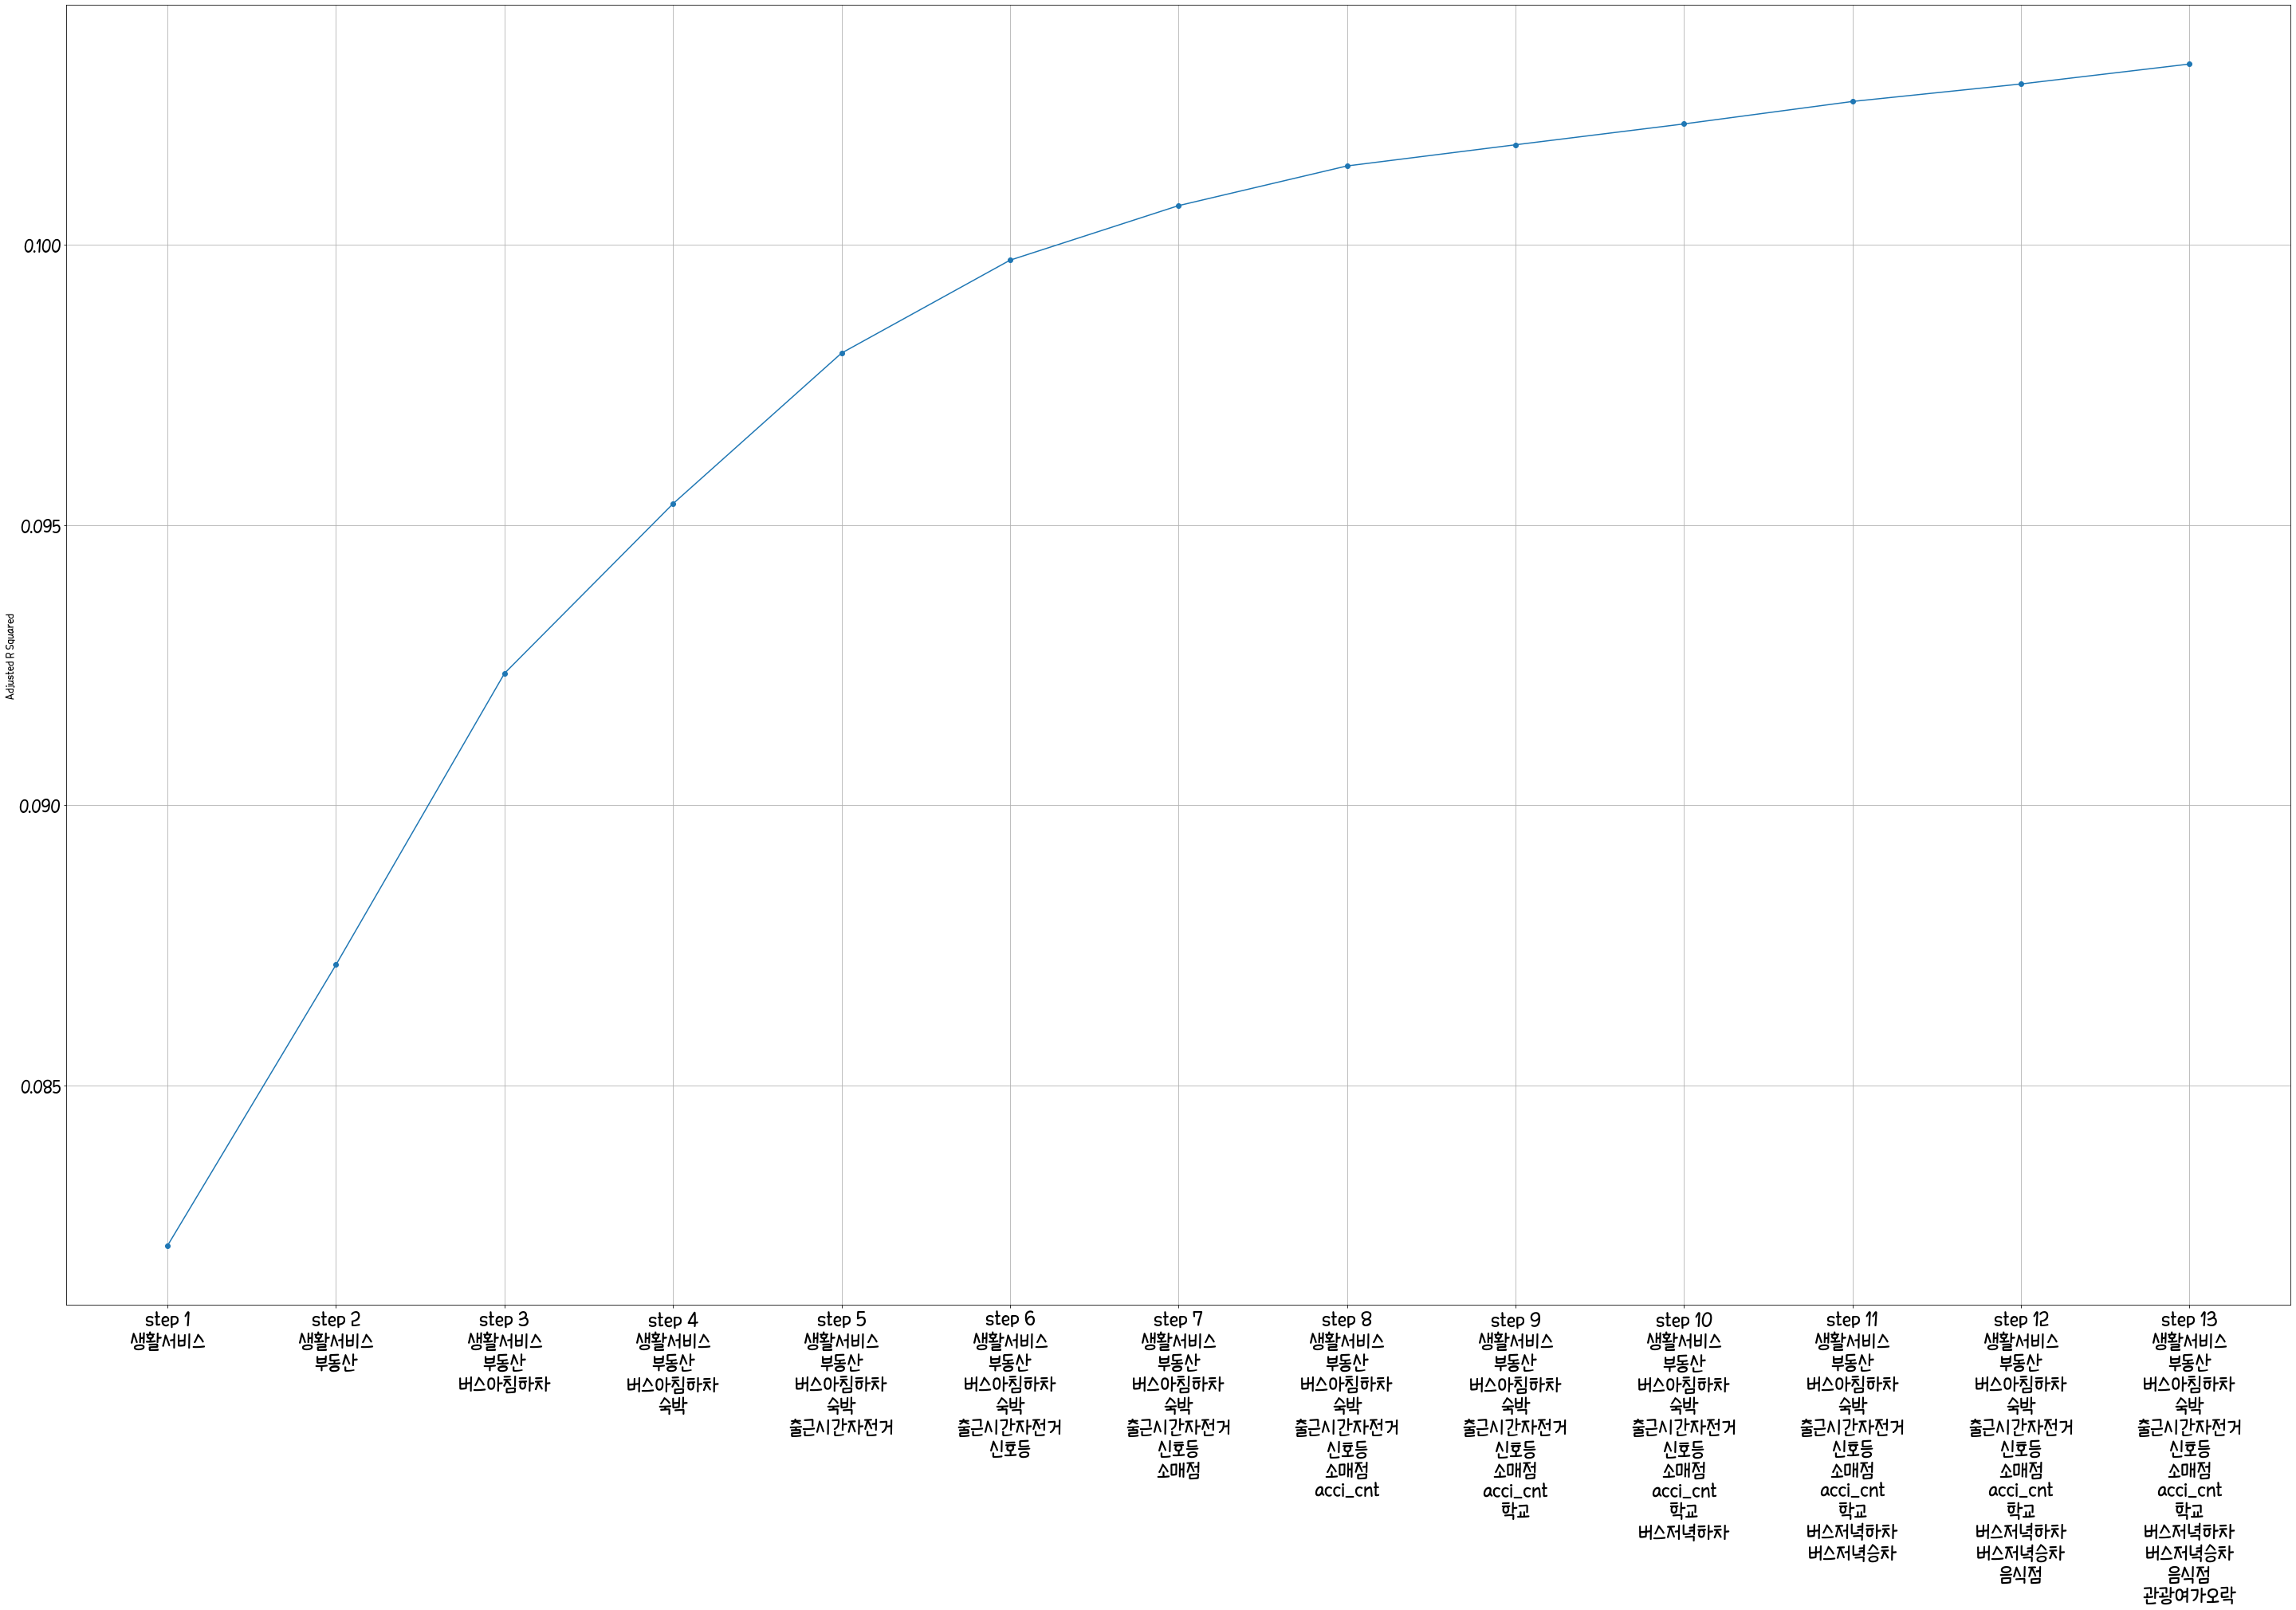

In [171]:
plt.rcParams['font.size'] =23

# upper matrix
fig = plt.figure(figsize=(50,30))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=27)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.savefig('output/그리드 전처리 완료/종속변수인구전진단계.png')



In [11]:
data_final2.columns

Index(['gid', 'acci_cnt', '2030val', '과속방지턱', '무인카메라', '신호등', '버스아침승차',
       '버스아침하차', '버스저녁승차', '버스저녁하차', '관광여가오락', '부동산', '생활서비스', '소매점', '숙박',
       '스포츠', '음식점', '학교', '교육', '출근시간자전거', '퇴근시간자전거', '지하철아침승차', '지하철아침하차',
       '지하철저녁승차', '지하철저녁하차'],
      dtype='object')

In [28]:
data_final2 = pd.read_csv("output/그리드 전처리 완료/final3.csv", dtype = {'gid':str, 'acci_cnt':float, '2030val':float, '과속방지턱':float, '무인카메라':float, '신호등':float, '버스아침승차':float,
       '버스아침하차':float, '버스저녁승차':float, '버스저녁하차':float, '관광여가오락':float, '부동산':float, '생활서비스':float, '소매점':float, '숙박':float,
       '스포츠':float, '음식점':float, '학교':float, '교육':float, '출근시간자전거':float, '퇴근시간자전거':float, '지하철아침승차':float, '지하철아침하차':float,
       '지하철저녁승차':float, '지하철저녁하차':float})
data_final2

,gid,acci_cnt,2030val,과속방지턱,무인카메라,신호등,버스아침승차,버스아침하차,버스저녁승차,버스저녁하차,...,스포츠,음식점,학교,교육,출근시간자전거,퇴근시간자전거,지하철아침승차,지하철아침하차,지하철저녁승차,지하철저녁하차
0,다사542434,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.146667,0.183732,0.0,0.0,0.0,0.0
1,다사547430,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.170000,0.122488,0.0,0.0,0.0,0.0
2,다사549419,1.0,0.326829,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000957,0.0,0.0,0.0,0.0
3,다사551417,1.0,0.126829,0.0,0.0,0.000000,0.217674,0.642015,0.247114,0.430773,...,0.0,0.014925,0.0,0.000000,0.003333,0.000000,0.0,0.0,0.0,0.0
4,다사564435,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.044776,0.0,0.000000,0.046667,0.043062,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,다사612444,1.0,0.000000,0.0,0.0,0.181818,0.000000,0.000000,0.000000,0.000000,...,0.0,0.134328,0.0,0.333333,0.110000,0.100478,0.0,0.0,0.0,0.0
57,다사613445,1.0,0.000000,0.0,0.0,0.181818,0.072777,0.291838,0.416527,0.226660,...,0.0,0.223881,0.0,0.333333,0.293333,0.303349,0.0,0.0,0.0,0.0
58,다사613446,1.0,0.204878,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.089552,0.0,0.277778,0.210000,0.214354,0.0,0.0,0.0,0.0
59,다사619457,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,1.000000,0.800000,0.0,0.0,0.0,0.0


In [22]:
data_final2 = data_final2.set_index("gid")
data_final2

,acci_cnt,2030val,과속방지턱,무인카메라,신호등,버스아침승차,버스아침하차,버스저녁승차,버스저녁하차,관광여가오락,...,스포츠,음식점,학교,교육,출근시간자전거,퇴근시간자전거,지하철아침승차,지하철아침하차,지하철저녁승차,지하철저녁하차
gid,,,,,,,,,,,,,,,,,,,,,
다사542434,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.146667,0.183732,0.0,0.0,0.0,0.0
다사547430,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.170000,0.122488,0.0,0.0,0.0,0.0
다사549419,1.0,0.326829,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000957,0.0,0.0,0.0,0.0
다사551417,1.0,0.126829,0.0,0.0,0.000000,0.217674,0.642015,0.247114,0.430773,0.000000,...,0.0,0.014925,0.0,0.000000,0.003333,0.000000,0.0,0.0,0.0,0.0
다사564435,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.044776,0.0,0.000000,0.046667,0.043062,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
다사612444,1.0,0.000000,0.0,0.0,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.134328,0.0,0.333333,0.110000,0.100478,0.0,0.0,0.0,0.0
다사613445,1.0,0.000000,0.0,0.0,0.181818,0.072777,0.291838,0.416527,0.226660,0.333333,...,0.0,0.223881,0.0,0.333333,0.293333,0.303349,0.0,0.0,0.0,0.0
다사613446,1.0,0.204878,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.089552,0.0,0.277778,0.210000,0.214354,0.0,0.0,0.0,0.0


In [29]:
# 전진단계별 선택법

variables = data_final2[['2030val', '과속방지턱', '무인카메라', '신호등', '버스아침승차',
       '버스아침하차', '버스저녁승차', '버스저녁하차', '관광여가오락', '부동산', '생활서비스', '소매점', '숙박',
       '스포츠', '음식점', '학교', '교육', '출근시간자전거', '퇴근시간자전거', '지하철아침승차', '지하철아침하차',
       '지하철저녁승차', '지하철저녁하차']]
y = data_final2[['acci_cnt']]


selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = data_final2[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = data_final2[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(data_final2[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

<ipython-input-29-aa2e6d095dd7>:20: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value


In [36]:
## 전진 선택법

variables = data_final2[[ '2030val', '과속방지턱', '무인카메라', '신호등', '버스아침승차',
       '버스아침하차', '버스저녁승차', '버스저녁하차', '관광여가오락', '부동산', '생활서비스', '소매점', '숙박',
       '스포츠', '음식점', '학교', '교육', '출근시간자전거', '퇴근시간자전거', '지하철아침승차', '지하철아침하차',
       '지하철저녁승차', '지하철저녁하차']]
y = data_final2[['acci_cnt']]

selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = data_final2[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(data_final2[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [37]:
selected_variables

[]

In [38]:
x_data2 = data_final2[[ '2030val', '과속방지턱', '무인카메라', '신호등', '버스아침승차',
       '버스아침하차', '버스저녁승차', '버스저녁하차', '관광여가오락', '부동산', '생활서비스', '소매점', '숙박',
       '스포츠', '음식점', '학교', '교육', '출근시간자전거', '퇴근시간자전거', '지하철아침승차', '지하철아침하차',
       '지하철저녁승차', '지하철저녁하차']]
x_data2.head()

,2030val,과속방지턱,무인카메라,신호등,버스아침승차,버스아침하차,버스저녁승차,버스저녁하차,관광여가오락,부동산,...,스포츠,음식점,학교,교육,출근시간자전거,퇴근시간자전거,지하철아침승차,지하철아침하차,지하철저녁승차,지하철저녁하차
0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.146667,0.183732,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.170000,0.122488,0.0,0.0,0.0,0.0
2,0.326829,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000957,0.0,0.0,0.0,0.0
3,0.126829,0.0,0.0,0.0,0.217674,0.642015,0.247114,0.430773,0.0,0.230769,...,0.0,0.014925,0.0,0.0,0.003333,0.000000,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.044776,0.0,0.0,0.046667,0.043062,0.0,0.0,0.0,0.0


In [40]:
target =  data_final2[['acci_cnt']]


In [49]:

# VIF사용을 위한 라이브러리, statsmodels안에 존재한다.
# 사실 모든 통계기법이 statsmodels 모듈에 존재하여 
# 이 중에 필요한 통계기법을 찾아 import를 진행하면 된다.

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data2.values, i) for i in range(x_data2.shape[1])]
vif["features"] = x_data2.columns
vif

,VIF Factor,features
0,1.353486,2030val
1,NaN,과속방지턱
2,3.608882,무인카메라
3,3.373385,신호등
4,34.982395,버스아침승차
5,28.448350,버스아침하차
6,11.914334,버스저녁승차
7,87.749908,버스저녁하차
8,3.379910,관광여가오락
9,5.401654,부동산


In [ ]:
from statsmodels.stats.outliers_

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
# 상수항 추가
x_data2_ = sm.add_constant(x_data2, has_constant = "add")

# 회귀모델 적합
multi_model2 = sm.OLS(target, x_data2_)
fitted_multi_model2 = multi_model2.fit()

# 결과 출력
fitted_multi_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               acci_cnt   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     1.199
Date:                Thu, 20 May 2021   Prob (F-statistic):              0.305
Time:                        17:26:25   Log-Likelihood:                 32.178
No. Observations:                  61   AIC:                            -24.36
Df Residuals:                      41   BIC:                             17.86
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0848      0.051     21.252      0.000       0.982       1.188
2030val       -0.1405      0.140     -1.006      0.320      -0.422       0.141
과속방지턱        7.21e-16    2.9e-16      2.490      0.017    1.36e-16    1.31e-15
무인카메라          0.6919      0.334      2.072      0.045       0.018       1.366
신호등           -0.0187      0.144     -0.130      0.898      -0.310       0.272
버스아침승차        -1.6565      0.775     -2.137      0.039      -3.222      -0.091
버스아침하차        -1.2695      0.375     -3.385      0.002      -2.027      -0.512
버스저녁승차        -0.5745      0.383     -1.499      0.141      -1.348       0.199
버스저녁하차         3.4370      0.976      3.522      0.001       1.466       5.407
관광여가오락         0.0609      0.136      0.447      0.657      -0.214       0.336
부동산           -0.0148      0.309     -0.048      0.962      -0.639       0.609
생활서비스         -0.1292      0.263     -0.491      0.626      -0.660       0.402
소매점            0.5582      0.436      1.279      0.208      -0.323       1.440
숙박            -0.0120      0.146     -0.083      0.935      -0.306       0.282
스포츠           -0.0905      0.226     -0.400      0.691      -0.547       0.366
음식점           -0.1783      0.214     -0.833      0.410      -0.611       0.254
학교             0.0561      0.193      0.290      0.773      -0.334       0.446
교육            -0.1360      0.164     -0.831      0.411      -0.467       0.195
출근시간자전거        0.2211      0.254      0.869      0.390      -0.292       0.735
퇴근시간자전거       -0.2708      0.228     -1.186      0.242      -0.732       0.190
지하철아침승차        0.0601      0.060      0.998      0.324      -0.061       0.182
지하철아침하차        0.0601      0.060      0.998      0.324      -0.061       0.182
지하철저녁승차        0.0601      0.060      0.998      0.324      -0.061       0.182
지하철저녁하차        0.0601      0.060      0.998      0.324      -0.061       0.182
==============================================================================
Omnibus:                       83.308   Durbin-Watson:                   1.657
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1198.153
Skew:                           3.858   Prob(JB):                    6.67e-261
Kurtosis:                      23.294   Cond. No.                     2.09e+33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.81e-65. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [42]:
fitted_multi_model.params

NameError: name 'fitted_multi_model' is not defined

In [34]:
# 전진단계별 선택법

variables = data_final2[[ '2030val', '과속방지턱', '무인카메라', '신호등', '버스아침승차',
       '버스아침하차', '버스저녁승차', '버스저녁하차', '관광여가오락', '부동산', '생활서비스', '소매점', '숙박',
       '스포츠', '음식점', '학교', '교육', '출근시간자전거', '퇴근시간자전거', '지하철아침승차', '지하철아침하차',
       '지하철저녁승차', '지하철저녁하차']]
y = data_final2[['acci_cnt']]


selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = data_final2[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = data_final2[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(data_final2[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [ ]:
dtype = 'object'

In [35]:
selected_variables

[]

In [64]:
x_data = data_final2[['2030val', '무인카메라', '신호등', '관광여가오락', '부동산', '생활서비스', '소매점', '숙박', '스포츠','학교', '퇴근시간자전거']] 
target = data_final2[["acci_cnt"]]


# OLS 검정
multi_model = sm.OLS(target, x_data)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               acci_cnt   R-squared (uncentered):                   0.709
Model:                            OLS   Adj. R-squared (uncentered):              0.645
Method:                 Least Squares   F-statistic:                              11.09
Date:                Thu, 20 May 2021   Prob (F-statistic):                    5.23e-10
Time:                        17:48:09   Log-Likelihood:                         -51.730
No. Observations:                  61   AIC:                                      125.5
Df Residuals:                      50   BIC:                                      148.7
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
2030val        1.5118      0.416      3.638      0.001       0.677       2.347
무인카메라         -0.2976      1.008     -0.295      0.769      -2.322       1.727
신호등            0.9444      0.347      2.720      0.009       0.247       1.642
관광여가오락        -0.0696      0.377     -0.184      0.854      -0.828       0.688
부동산            0.8055      1.008      0.799      0.428      -1.220       2.831
생활서비스         -0.4347      0.906     -0.480      0.634      -2.255       1.386
소매점            0.6321      1.161      0.544      0.589      -1.701       2.965
숙박             0.5195      0.480      1.082      0.285      -0.445       1.484
스포츠            0.8421      0.775      1.087      0.282      -0.714       2.398
학교            -0.2636      0.662     -0.398      0.692      -1.593       1.065
퇴근시간자전거        1.5029      0.347      4.326      0.000       0.805       2.201
==============================================================================
Omnibus:                        4.251   Durbin-Watson:                   1.186
Prob(Omnibus):                  0.119   Jarque-Bera (JB):                4.137
Skew:                          -0.252   Prob(JB):                        0.126
Kurtosis:                       4.172   Cond. No.                         8.18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""